# Desafío 2 - Properati

## I. Modelo base: Precios hedónicos

Con el objeto de interpretar las relaciones entre la variable objetivo y las descriptivas, partimos de un modelo relativamente sencillo, conocido como Modelo de Precios Hedónicos y lo ejecutamos con statsmodels para verificar la significancia de las variables. Dicho modelo tiene la forma:
$$ \ln{(\text{price_usd_per_m2})} = \beta_0+\beta_1\times\text{rooms}+\beta_2\times\text{surface_total_in_m2}+\beta_{3i}\times\text{property_type}_i+\beta_{4i}\times\text{localidad}_i$$

donde $\text{property_type}$ y $\text{localidad}$ son variables categóricas.

Para ello, importamos el dataset limpio y las librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('df2.csv')

E:\Miniconda3\envs\ds37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
E:\Miniconda3\envs\ds37\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


'PH en Azul, apartment en Naranja, house en Verde y store en Rojo'

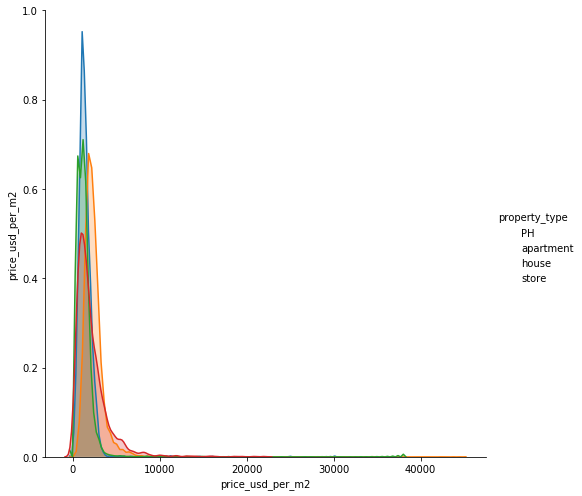

In [165]:
sns.pairplot(df, vars=['price_usd_per_m2'], hue='property_type', height=7, markers='property_type'); 'PH en Azul, \
apartment en Naranja, house en Verde y store en Rojo'

'PH en Azul, apartment en Naranja, house en Verde y store en Rojo'

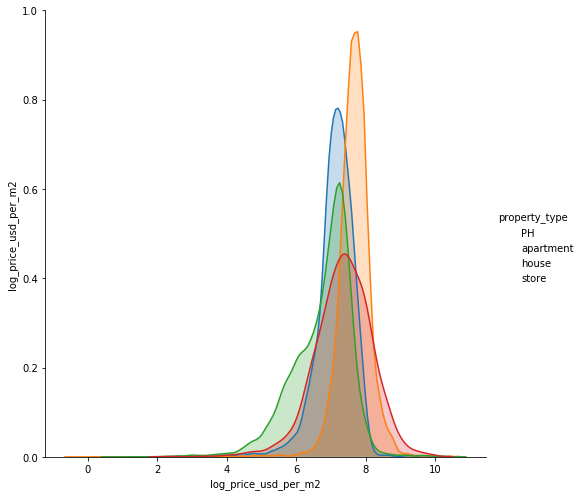

In [168]:
sns.pairplot(df, vars=['log_price_usd_per_m2'], hue='property_type', height=7, markers='property_type'); 'PH en Azul, \
apartment en Naranja, house en Verde y store en Rojo'

#### Nos aseguramos que la variable `price_usd_per_m2` esté completa y obtenemos las variables logarítmicas actualizadas

```python
df['price_usd_per_m2'] = df.price_usd_per_m2.fillna(df.price/df.surface_total_in_m2)
df['log_price'] = df.price.apply(np.log)
df['log_price_aprox_usd'] = df.price_aprox_usd.apply(np.log)
df['log_price_usd_per_m2'] = df.price_usd_per_m2.apply(np.log)  
```    

<p style="color:red;"><b> NO EJECUTAR LO ANTERIOR </p></b> Provoca la pérdida de efectividad del modelo

### A) Generamos el modelo descrito arriba con statsmodels

In [109]:
model_base = smf.ols('log_price_usd_per_m2 ~ rooms + surface_total_in_m2 +surface_covered_in_m2 + C(property_type) + C(localidad)', data=df)
model_base.fit().summary2()

E:\Miniconda3\envs\ds37\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
E:\Miniconda3\envs\ds37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\Miniconda3\envs\ds37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\Miniconda3\envs\ds37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Ordinary least squares
====================================================================================================
Model:                         OLS                           Adj. R-squared:              0.614     
Dependent Variable:            log_price_usd_per_m2          AIC:                         37371.5474
Date:                          2019-10-08 21:45              BIC:                         39676.9606
No. Observations:              27823                         Log-Likelihood:              -18406.   
Df Model:                      279                           F-statistic:                 159.9     
Df Residuals:                  27543                         Prob (F-statistic):          0.00      
R-squared:                     0.618                         Scale:                       0.22208   
----------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------------------------
Intercept                                            7.2585   0.0704 103.0774 0.0000  7.1205  7.3966
C(property_type)[T.apartment]                        0.4409   0.0114  38.7563 0.0000  0.4186  0.4632
C(property_type)[T.house]                           -0.3786   0.0130 -29.1444 0.0000 -0.4040 -0.3531
C(property_type)[T.store]                            0.2874   0.0579   4.9648 0.0000  0.1740  0.4009
C(localidad)[T.Achiras]                             -0.0000   0.0000  -1.2652 0.2058 -0.0000  0.0000
C(localidad)[T.Adolfo Alsina]                        0.0000   0.0000   8.0925 0.0000  0.0000  0.0000
C(localidad)[T.Agronomía]                            0.0521   0.1241   0.4199 0.6746 -0.1912  0.2954
C(localidad)[T.Agua Blanca]                          0.0000   0.0000  11.2982 0.0000  0.0000  0.0000
C(localidad)[T.Agua de Oro]                          0.0000   0.0000   2.4596 0.0139  0.0000  0.0000
C(localidad)[T.Aguas Verdes]                        -1.3964   0.2046  -6.8242 0.0000 -1.7975 -0.9953
C(localidad)[T.Aldea Brasilera]                     -1.2228   0.4764  -2.5666 0.0103 -2.1566 -0.2890
C(localidad)[T.Aldea Salto]                          0.0000   0.0000   1.9789 0.0478  0.0000  0.0000
C(localidad)[T.Alejandro Roca]                       3.2256   0.4765   6.7694 0.0000  2.2916  4.1596
C(localidad)[T.Almafuerte]                           0.0000   0.0000   2.0020 0.0453  0.0000  0.0000
C(localidad)[T.Almagro]                              0.0371   0.0724   0.5116 0.6089 -0.1049  0.1790
C(localidad)[T.Almirante Brown]                     -0.3615   0.0787  -4.5951 0.0000 -0.5157 -0.2073
C(localidad)[T.Alta Gracia]                         -1.8126   0.4764  -3.8045 0.0001 -2.7464 -0.8787
C(localidad)[T.Aluminé]                             -0.0000   0.0000  -2.8819 0.0040 -0.0000 -0.0000
C(localidad)[T.Alvear]                              -0.2394   0.4765  -0.5024 0.6154 -1.1734  0.6945
C(localidad)[T.Anisacate]                            0.0000   0.0000   1.8067 0.0708 -0.0000  0.0000
C(localidad)[T.Apóstoles]                           -0.3091   0.4765  -0.6488 0.5165 -1.2430  0.6248
C(localidad)[T.Arequito]                            -0.3497   0.4764  -0.7342 0.4628 -1.2834  0.5840
C(localidad)[T.Arocena]                              0.0000   0.0000   2.2048 0.0275  0.0000  0.0000
C(localidad)[T.Arroyo Ceibal]                       -0.0000   0.0000  -2.7180 0.0066 -0.0000 -0.0000
C(localidad)[T.Arroyo Leyes]                        -0.0000   0.0000  -0.7046 0.4811 -0.0000  0.0000
C(localidad)[T.Arroyo Seco]                         -1.2233   0.4765  -2.5676 0.0102 -2.1572 -0.2895
C(localidad)[T.Ascochinga]                          -0.0000   0.0000  -4.1488 0.0000 -0.0000 -0.0000
C(localidad)[T.Ataliva]                        

Como podemos observar en el output anterior, el modelo se está fiteando sobre $27823$ observaciones y estamos describiendo un $0.614 (R^2=0.618)$ de la variación en el precio de los inmuebles.

A continuación probamos ingresar las dummies de Amenities, Seguridad, Cochera, A Estrenar, Gimnasio, Lavadero, Parrilla, Pileta, Sum y una transformación sobre rooms para aumentar el poder descriptivo del modelo. También optamos por no calcular un intercepto, ya que no tiene mucho sentido.

In [152]:
model_base_mod =  smf.ols('log_price_usd_per_m2 ~ C(rooms)  + surface_total_in_m2 + \
                            surface_covered_in_m2 + C(property_type) + C(localidad) + Seguridad + \
                            Amenities + Cochera + Estrenar + Gimnasio + Lavadero + Parrilla + Pileta + SUM -1', data=df)
model_base_mod.fit().summary2()

E:\Miniconda3\envs\ds37\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
E:\Miniconda3\envs\ds37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\Miniconda3\envs\ds37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\Miniconda3\envs\ds37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Ordinary least squares
====================================================================================================
Model:                         OLS                           Adj. R-squared:              0.630     
Dependent Variable:            log_price_usd_per_m2          AIC:                         36226.1857
Date:                          2019-10-09 12:15              BIC:                         38729.2056
No. Observations:              27823                         Log-Likelihood:              -17809.   
Df Model:                      303                           F-statistic:                 157.6     
Df Residuals:                  27519                         Prob (F-statistic):          0.00      
R-squared:                     0.634                         Scale:                       0.21295   
----------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------------------------------
C(rooms)[1.0]                                        7.2267   0.0692 104.3931 0.0000  7.0910  7.3624
C(rooms)[2.0]                                        7.2153   0.0691 104.4513 0.0000  7.0799  7.3507
C(rooms)[3.0]                                        7.1638   0.0690 103.8957 0.0000  7.0286  7.2989
C(rooms)[4.0]                                        7.1941   0.0691 104.0850 0.0000  7.0586  7.3296
C(rooms)[5.0]                                        7.2508   0.0696 104.1291 0.0000  7.1143  7.3873
C(rooms)[6.0]                                        7.2467   0.0716 101.2517 0.0000  7.1064  7.3870
C(rooms)[7.0]                                        7.2419   0.0744  97.3116 0.0000  7.0961  7.3878
C(rooms)[8.0]                                        7.2211   0.0835  86.4527 0.0000  7.0574  7.3849
C(rooms)[9.0]                                        7.4091   0.1135  65.2651 0.0000  7.1866  7.6316
C(rooms)[10.0]                                       7.2393   0.0915  79.1465 0.0000  7.0600  7.4185
C(rooms)[11.0]                                       6.8769   0.2014  34.1517 0.0000  6.4823  7.2716
C(rooms)[12.0]                                       7.1735   0.1714  41.8409 0.0000  6.8375  7.5095
C(rooms)[13.0]                                       7.5108   0.3571  21.0303 0.0000  6.8108  8.2108
C(rooms)[14.0]                                       6.4328   0.3345  19.2333 0.0000  5.7773  7.0884
C(rooms)[15.0]                                      11.0431   0.2947  37.4698 0.0000 10.4655 11.6208
C(rooms)[16.0]                                       7.3709   0.5304  13.8970 0.0000  6.3313  8.4105
C(rooms)[17.0]                                      -0.0000   0.0000  -6.4311 0.0000 -0.0000 -0.0000
C(rooms)[18.0]                                       0.0000   0.0000   0.4674 0.6402 -0.0000  0.0000
C(rooms)[19.0]                                      -0.0000   0.0000  -2.7344 0.0063 -0.0000 -0.0000
C(rooms)[20.0]                                       0.0000   0.0000   3.6192 0.0003  0.0000  0.0000
C(rooms)[21.0]                                      -0.0000   0.0000  -1.0303 0.3029 -0.0000  0.0000
C(rooms)[22.0]                                       7.3820   0.4670  15.8087 0.0000  6.4667  8.2973
C(rooms)[23.0]                                       0.0000   0.0000   1.6326 0.1026 -0.0000  0.0000
C(rooms)[24.0]                                       0.0000   0.0000   1.8704 0.0614 -0.0000  0.0000
C(rooms)[25.0]                                       0.0000   0.0000   0.5253 0.5994 -0.0000  0.0000
C(rooms)[27.0]                                      -0.0000   0.0000  -3.9643 0.0001 -0.0000 -0.0000
C(rooms)[28.0]                                       0.0000   0.0000   4.7845 0.0000  0.0000  0.0000
C(rooms)[29.0]                                 

Revisamos por qué hay tantas localidades y barrios que no son significativos. Para ello agrupamos las observaciones por localidad, obtenemos los estadísitcos básicos, filtramos por las que no son NaN y las ordenamos por desvío estándar.

In [8]:
varianzas = df.groupby('localidad').log_price_usd_per_m2.describe()
display(varianzas.shape)
varianzas.loc[varianzas['std'].isnull()==False].sort_values('std', ascending=False)

(519, 8)

,count,mean,std,min,25%,50%,75%,max
localidad,,,,,,,,
La Cumbre,2.0,5.478362,2.792535e+00,3.503741,4.491052,5.478362,6.465672,7.452982
Nono,3.0,5.096565,2.634353e+00,2.525729,3.749775,4.973821,6.381983,7.790144
Brandsen,8.0,6.165967,2.110951e+00,1.487623,5.556291,7.272223,7.482739,7.536364
Plottier,7.0,6.382504,2.015403e+00,2.607617,5.844774,6.860058,7.180629,9.159047
Los Hornillos,2.0,5.425119,1.907923e+00,4.076014,4.750566,5.425119,6.099671,6.774224
...,...,...,...,...,...,...,...,...
Villa Icho Cruz,2.0,5.401889,2.529902e-03,5.400100,5.400995,5.401889,5.402783,5.403678
Dorrego,3.0,5.636283,1.087792e-15,5.636283,5.636283,5.636283,5.636283,5.636283
Timbúes,3.0,4.448693,0.000000e+00,4.448693,4.448693,4.448693,4.448693,4.448693


De las 519 localidades que tenemos, sólo tenemos datos del logaritmo de los precios en 270, lo cual explica el resultado. También podemos observar cuáles son las localidades con mayor desviación estándar.

Por este motivo, agrupamos las observaciones por "provincia" y contamos la cantidad de observaciones que tenemos en cada una

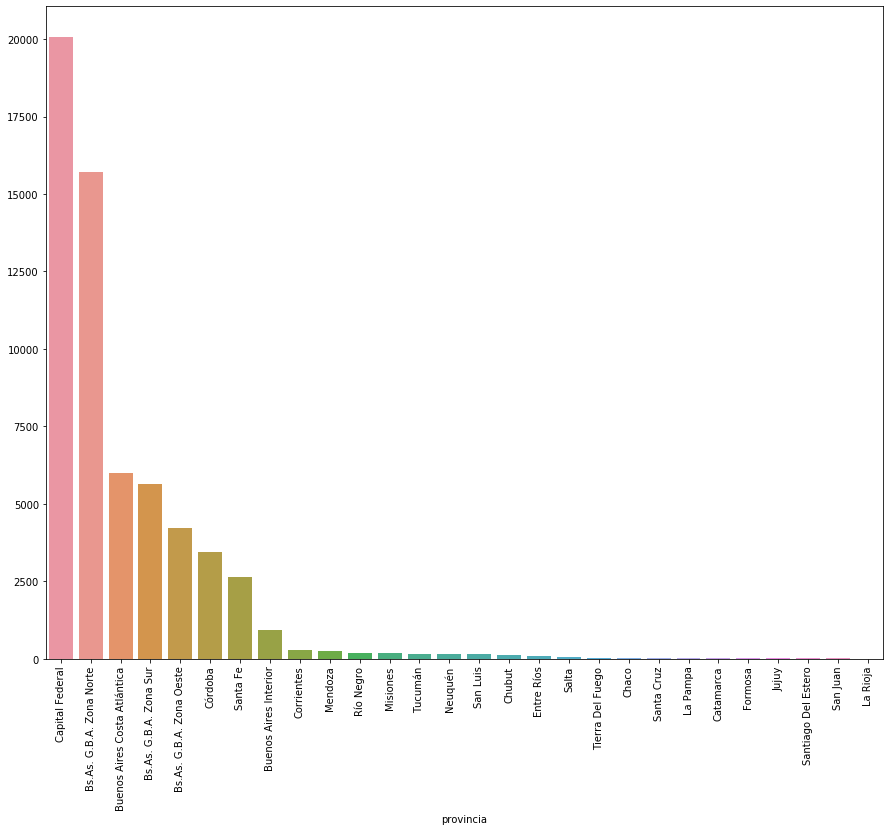

In [73]:
datos_por_zona = df.groupby('provincia').count()['log_price_usd_per_m2'].sort_values(ascending=False)
plt.figure(figsize=(15,12))
sns.barplot(datos_por_zona.index, datos_por_zona.values).set_xticklabels(labels=datos_por_zona.index, rotation=90);

##### Como podemos ver, a partir de Corrientes las provincias no aportan mucha información al modelo, por lo que dropeamos las observaciones de dichas provincias.

In [111]:
df_limpio = df.loc[(df.provincia==datos_por_zona.index[0])|(df.provincia==datos_por_zona.index[1])|(df.provincia==datos_por_zona.index[2])|(df.provincia==datos_por_zona.index[3])|\
       (df.provincia==datos_por_zona.index[4])|(df.provincia==datos_por_zona.index[5])|(df.provincia==datos_por_zona.index[6])|(df.provincia==datos_por_zona.index[7])]

### B. Análisis de la variable `rooms`
Esperábamos que la variable rooms no tuviera una relación lineal con el logaritmo de los precios. ¿Qué significa esto? Que probablemente necesitábamos un polinomio de mayor grado ya que es de esperar que las diferencias marginales de pasar de un Monoambiente a un departamento de 2 ambientes sean mayores que las de un departamento de 8 dormitorios versus 9.

Para poder captar dicha relación no lineal, primero graficamos un scatter plot:

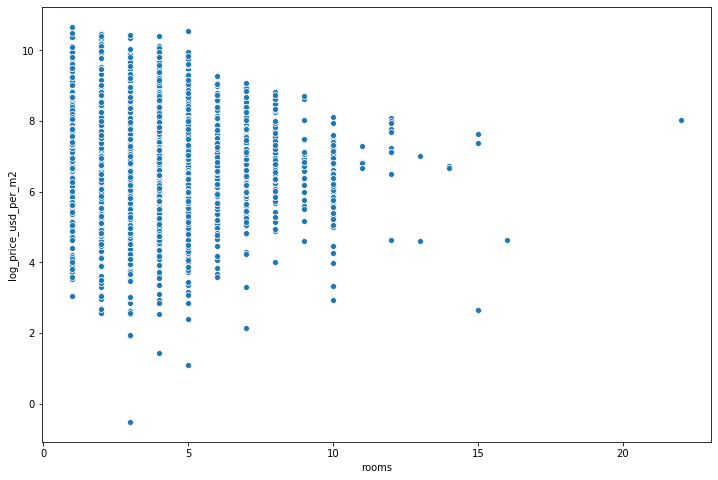

In [160]:
plt.figure(figsize=(12,8))
sns.scatterplot(df.rooms, df.log_price_usd_per_m2);

##### Como se puede observar, no existe una relación clara entre las variables, por lo que optamos utilizar dummies

In [158]:
model_limpio_mod =  smf.ols('log_price_usd_per_m2 ~ C(rooms) + surface_total_in_m2 + \
                            surface_covered_in_m2 + C(property_type)  + Seguridad + \
                            Amenities + Cochera + Estrenar + Gimnasio + Lavadero + Parrilla + Pileta + SUM +C(localidad) -1', data=df_limpio)
model_limpio_mod.fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Ordinary least squares
================================================================================================
Model:                       OLS                          Adj. R-squared:             0.630     
Dependent Variable:          log_price_usd_per_m2         AIC:                        34710.6944
Date:                        2019-10-09 12:21             BIC:                        36625.4218
No. Observations:            27384                        Log-Likelihood:             -17122.   
Df Model:                    232                          F-statistic:                202.3     
Df Residuals:                27151                        Prob (F-statistic):         0.00      
R-squared:                   0.634                        Scale:                      0.20622   
------------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------------------------
C(rooms)[1.0]                                    7.2265   0.0681 106.0631 0.0000  7.0930  7.3601
C(rooms)[2.0]                                    7.2135   0.0680 106.1011 0.0000  7.0803  7.3468
C(rooms)[3.0]                                    7.1611   0.0679 105.5243 0.0000  7.0281  7.2941
C(rooms)[4.0]                                    7.1939   0.0680 105.7505 0.0000  7.0605  7.3272
C(rooms)[5.0]                                    7.2394   0.0685 105.6138 0.0000  7.1051  7.3738
C(rooms)[6.0]                                    7.2399   0.0705 102.7041 0.0000  7.1017  7.3780
C(rooms)[7.0]                                    7.2527   0.0734  98.7881 0.0000  7.1088  7.3966
C(rooms)[8.0]                                    7.2368   0.0831  87.0553 0.0000  7.0739  7.3998
C(rooms)[9.0]                                    7.4109   0.1127  65.7645 0.0000  7.1901  7.6318
C(rooms)[10.0]                                   7.2307   0.0903  80.0382 0.0000  7.0537  7.4078
C(rooms)[11.0]                                   6.8740   0.1982  34.6883 0.0000  6.4856  7.2624
C(rooms)[12.0]                                   7.1608   0.1749  40.9352 0.0000  6.8179  7.5037
C(rooms)[13.0]                                   7.6695   0.4605  16.6565 0.0000  6.7670  8.5720
C(rooms)[14.0]                                   6.4314   0.3291  19.5397 0.0000  5.7862  7.0765
C(rooms)[15.0]                                  11.0144   0.2908  37.8811 0.0000 10.4445 11.5844
C(rooms)[16.0]                                  -0.0000   0.0000 -24.3521 0.0000 -0.0000 -0.0000
C(rooms)[17.0]                                  -0.0000   0.0000 -18.3015 0.0000 -0.0000 -0.0000
C(rooms)[18.0]                                   0.0000   0.0000   6.9770 0.0000  0.0000  0.0000
C(rooms)[19.0]                                  -0.0000   0.0000  -3.9228 0.0001 -0.0000 -0.0000
C(rooms)[20.0]                                   0.0000   0.0000   5.7051 0.0000  0.0000  0.0000
C(rooms)[21.0]                                  -0.0000   0.0000  -4.1645 0.0000 -0.0000 -0.0000
C(rooms)[22.0]                                   7.3801   0.4595  16.0600 0.0000  6.4794  8.2808
C(rooms)[23.0]                                   0.0000   0.0000   5.0829 0.0000  0.0000  0.0000
C(rooms)[24.0]                                   0.0000   0.0000   2.2163 0.0267  0.0000  0.0000
C(rooms)[25.0]                                  -0.0000   0.0000  -0.8044 0.4212 -0.0000  0.0000
C(rooms)[27.0]                                   0.0000   0.0000   1.8750 0.0608 -0.0000  0.0000
C(rooms)[28.0]                                  -0.0000   0.0000  -2.9875 0.0028 -0.0000 -0.0000
C(rooms)[29.0]                                   0.0000   0.0000   2.6085 0.0091  0.0000  0.0000
C(rooms)[30.0]                                  -0.0000   0.0000  -0.4448 0.6565 -0.0000  0.0000
C(rooms

Como se puede observar, dropear dichas provincias no generó pérdida de información, ya que tanto el $R^2$ como el $R^2 \text{ajustado}$ toman los mismos valores que antes

#### Observamos la variablidad del logaritmo de los precios de cada Barrio de CABA

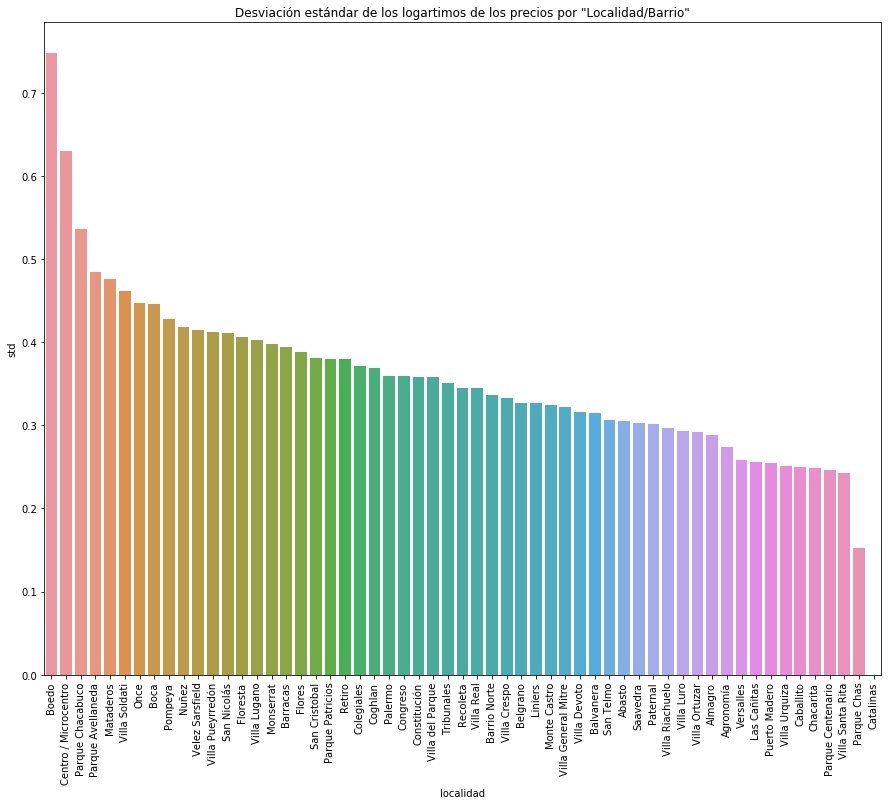

In [107]:
variabilidad = df.loc[df.provincia=='Capital Federal'].groupby('localidad').log_price_usd_per_m2.describe().sort_values('std', ascending=False)
plt.figure(figsize=(15,12))
plt.title('Desviación estándar de los logartimos de los precios por "Localidad/Barrio"')
sns.barplot(variabilidad.index, variabilidad['std']).set_xticklabels(labels=variabilidad.index, rotation=90);

In [170]:
model_caba =  smf.ols('log_price_usd_per_m2 ~ C(rooms) + surface_total_in_m2 + \
                            surface_covered_in_m2 + C(property_type)  + Seguridad + \
                            Amenities + Cochera + Estrenar + Gimnasio + Lavadero + Parrilla + Pileta + SUM +C(localidad)', data=df.loc[df.provincia=='Capital Federal'])
model_caba.fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                   OLS                       Adj. R-squared:          0.542    
Dependent Variable:      log_price_usd_per_m2      AIC:                     4824.7299
Date:                    2019-10-09 12:47          BIC:                     5451.6631
No. Observations:        11798                     Log-Likelihood:          -2327.4  
Df Model:                84                        F-statistic:             167.4    
Df Residuals:            11713                     Prob (F-statistic):      0.00     
R-squared:               0.546                     Scale:                   0.087500 
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------------
Intercept                             7.4157   0.0451 164.4886 0.0000  7.3273  7.5041
C(rooms)[T.2.0]                      -0.0542   0.0086  -6.2920 0.0000 -0.0710 -0.0373
C(rooms)[T.3.0]                      -0.0695   0.0091  -7.6686 0.0000 -0.0872 -0.0517
C(rooms)[T.4.0]                      -0.1088   0.0108 -10.0373 0.0000 -0.1301 -0.0876
C(rooms)[T.5.0]                      -0.1363   0.0160  -8.5315 0.0000 -0.1677 -0.1050
C(rooms)[T.6.0]                      -0.1563   0.0239  -6.5431 0.0000 -0.2032 -0.1095
C(rooms)[T.7.0]                      -0.2539   0.0322  -7.8921 0.0000 -0.3170 -0.1909
C(rooms)[T.8.0]                      -0.2511   0.0526  -4.7711 0.0000 -0.3543 -0.1479
C(rooms)[T.9.0]                      -0.2546   0.1067  -2.3850 0.0171 -0.4638 -0.0453
C(rooms)[T.10.0]                     -0.3106   0.0966  -3.2146 0.0013 -0.5000 -0.1212
C(rooms)[T.11.0]                     -0.8650   0.1350  -6.4074 0.0000 -1.1296 -0.6004
C(rooms)[T.12.0]                     -0.3563   0.1071  -3.3259 0.0009 -0.5663 -0.1463
C(rooms)[T.13.0]                     -0.8474   0.3064  -2.7657 0.0057 -1.4480 -0.2468
C(rooms)[T.14.0]                     -0.9682   0.2107  -4.5947 0.0000 -1.3812 -0.5551
C(rooms)[T.15.0]                     -0.3574   0.2121  -1.6853 0.0920 -0.7730  0.0583
C(rooms)[T.17.0]                     -0.0000   0.0000  -5.4290 0.0000 -0.0000 -0.0000
C(rooms)[T.18.0]                      0.0000   0.0000   2.4658 0.0137  0.0000  0.0000
C(rooms)[T.22.0]                      0.0000   0.0000   4.0483 0.0001  0.0000  0.0000
C(property_type)[T.apartment]         0.2254   0.0111  20.3040 0.0000  0.2037  0.2472
C(property_type)[T.house]            -0.1033   0.0181  -5.6961 0.0000 -0.1389 -0.0678
C(property_type)[T.store]             0.1098   0.0450   2.4384 0.0148  0.0215  0.1980
C(localidad)[T.Agronomía]            -0.0053   0.0782  -0.0677 0.9460 -0.1586  0.1480
C(localidad)[T.Almagro]               0.0772   0.0458   1.6878 0.0915 -0.0125  0.1669
C(localidad)[T.Balvanera]            -0.0460   0.0469  -0.9815 0.3264 -0.1378  0.0459
C(localidad)[T.Barracas]             -0.0727   0.0479  -1.5169 0.1293 -0.1665  0.0212
C(localidad)[T.Barrio Norte]          0.3340   0.0457   7.3151 0.0000  0.2445  0.4234
C(localidad)[T.Belgrano]              0.3512   0.0450   7.8036 0.0000  0.2630  0.4394
C(localidad)[T.Boca]                 -0.2559   0.0533  -4.7991 0.0000 -0.3604 -0.1514
C(localidad)[T.Boedo]                 0.3022   0.0505   5.9853 0.0000  0.2032  0.4011
C(localidad)[T.Caballito]             0.1303   0.0450   2.8931 0.0038  0.0420  0.2185
C(localidad)[T.Catalinas]            -0.0619   0.2994  -0.2068 0.8362 -0.6487  0.5249
C(localidad)[T.Centro / Microcentro]  0.0376   0.0509   0.7384 0.4603 -0.0622  0.1375
C(localidad)[T.Chacarita]             0.0635   0.0539   1.1776 0.2390 -0.0422  0.1691
C(localidad)[T.Coghlan]               0.2216   0.0526   4.2098 0.0000  0.1184  0.3248
C(localidad)[T.Colegia

### C. Interpretación de resultados

El modelo de Precios Hedónicos tiene la particularidad de ser fácilmente interpretable. Debido a que nuestro modelo tiene como objetivo una variable que sufrió una transformación logarítmica, la interpretación es ligeramente distinta. En este caso, los coeficientes de cada variable exógena significan una variación porcentual en el precio del metro cuadrado en dólares. Por ejemplo, en el modelo de CABA, el coeficiente de la variable **`Pileta`** es $0.1078$ $(0.0105)$, por lo que ***en promedio*** el hecho que el edificio tenga pileta, aumenta un $10,78\% $ el precio del metro cuadrado.

Por otra parte, el intercepto se puede considerar como el precio promedio que tiene un inmueble del modelo base, es decir, el que está compuesto por las dummies eliminadas. Finalmente, para poder obtener los precios en dólares y poder compararlos con la realidad, es necesario transformar el modelo nuevamente para eliminar el logaritmo. Esto es simplemente:

$$ \ln(\text{price_usd_per_m2}) = \beta_0 + \beta_i\times X_i + \epsilon,$$ donde $\beta_i$ es el vector de coeficientes estimados para cada variable de la matriz de características $ X_i$

<span style='font-size: large;'>
$$e^{\ln(\text{price_usd_per_m2})} = e^{\beta_0 + \beta_i\times X_i}$$</span>


que es igual a:
$$\text{price_usd_per_m2} = e^{\beta_0 + \beta_i\times X_i}$$

---------------------------------------


## Modelo 2: Modelo lineal con regularización Ridge, Lasso y ElasticNet

En esta sección nos dedicamos simplemente a regularizar y testear el modelo obtenido. Si bien no es un modelo que describa mucho, tampoco disponemos de mucha más información como para mejorar la performance.

### Paso 1: importar las librerías de ML

In [171]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Paso 2: Transformarmos rooms. 
Ya que no es lineal, incluimos un polinomio de grado 4 para describir su comportamiento

In [177]:
df['rooms2'] = df.rooms**2
df['rooms3'] = df.rooms**3
df['rooms4'] = df.rooms**4

### Paso 3: Generamos funciones para encontrar los alphas, realizar los splits y evaluar los modelos

In [178]:
def findAlphaLasso(X,y,randomState=53,tries=2,alphaFrom=0.000001,alphaTo=10,steps=10000):
    kf = KFold(n_splits=5, shuffle=True, random_state=randomState)
    step_value=(alphaTo-alphaFrom)/steps
    print("Lasso, try from {} to {}:".format(alphaFrom,alphaTo))
    prevAlphaTest=0
    for i in range(0,tries):
        al_lasso = np.linspace(alphaFrom, alphaTo, steps)
        lm_lasso_cv= LassoCV(alphas=al_lasso, cv=kf, normalize=False)
        lm_lasso_cv.fit(X, y)
        prevAlphaTest=lm_lasso_cv.alpha_
        alphaFrom = max(prevAlphaTest - step_value*2,0.000000000000001)
        alphaTo = prevAlphaTest   + step_value*2
        step_value=(alphaTo-alphaFrom)/steps
        print("intento {} Alpha Value {}. Next try from {} to {} ".format(i+1,lm_lasso_cv.alpha_,alphaFrom,alphaTo))
    print("Alpha Founded {}".format(lm_lasso_cv.alpha_))
    return lm_lasso_cv

def findAlphaRidge(X,y,randomState=53,tries=2,alphaFrom=0.000001,alphaTo=10,steps=1000):
    kf = KFold(n_splits=5, shuffle=True, random_state=randomState)
    step_value=(alphaTo-alphaFrom)/steps
    print("Ridge, try from {} to {}:".format(alphaFrom,alphaTo))
    prevAlphaTest=0
    for i in range(0,tries):
        al_ridge = np.linspace(alphaFrom, alphaTo, steps)
        lm_ridge_cv= RidgeCV(alphas=al_ridge, cv=kf, normalize=False)
        lm_ridge_cv.fit(X, y)
        prevAlphaTest=lm_ridge_cv.alpha_
        alphaFrom = max(prevAlphaTest - step_value*2,0.000000000000001)
        alphaTo = prevAlphaTest   + step_value*2
        step_value=(alphaTo-alphaFrom)/steps
        print("intento {} Alpha Value {}. Next try from {} to {} ".format(i+1,lm_ridge_cv.alpha_,alphaFrom,alphaTo))
    print("Alpha Founded {}".format(lm_ridge_cv.alpha_))
    return lm_ridge_cv


def findAlphaElasticNet(X,y,randomState=53,tries=2,alphaFrom=0.000001,alphaTo=10,steps=1000):
    kf = KFold(n_splits=5, shuffle=True, random_state=randomState)
    step_value=(alphaTo-alphaFrom)/steps
    print("ElasticNet, try from {} to {}:".format(alphaFrom,alphaTo))
    prevAlphaTest=0
    for i in range(0,tries):
        al_elastic = np.linspace(alphaFrom, alphaTo, steps)
        modelCV= ElasticNetCV(alphas=al_elastic, cv=kf, normalize=False)
        modelCV.fit(X, y)
        prevAlphaTest=modelCV.alpha_
        alphaFrom = max(prevAlphaTest - step_value*2,0.000000000000001)
        alphaTo = prevAlphaTest   + step_value*2
        step_value=(alphaTo-alphaFrom)/steps
        print("intento {} Alpha Value {}. Next try from {} to {} ".format(i+1,modelCV.alpha_,alphaFrom,alphaTo))
    print("Alpha Founded {}".format(modelCV.alpha_))
    return modelCV

def splitTest(df,provinciaFilter="",randomStates=53):
    columns=['log_price_usd_per_m2','rooms','rooms2','rooms3','rooms4','surface_total_in_m2','property_type','localidad',
    'Seguridad','Amenities','Cochera','Estrenar','Gimnasio','Lavadero','Parrilla','Pileta','SUM']
    if(provinciaFilter==""):
        X = df.loc[:,columns]
    else:
        X = df.loc[df.provincia==provinciaFilter,columns]    
    X = X.dropna()
    X = pd.get_dummies(X.property_type, drop_first=1).join(X).drop('property_type', axis=1)
    X = pd.get_dummies(X.localidad, drop_first=1).join(X).drop('localidad', axis=1)
    y = X['log_price_usd_per_m2']
    X = X.drop('log_price_usd_per_m2', axis=1)
    return train_test_split(X, y, test_size=0.30, random_state=randomStates)

def scoreByModel(model,X_train,X_test,y_train,y_test):
    print("Score Train : %.4f " %  model.score(X_train, y_train))
    print("Score Test : %.4f " %  model.score(X_test, y_test))

### Modelo 2.A: Lasso en CABA

In [179]:
X_caba_train,X_caba_test,y_caba_train,y_caba_test = splitTest(df,provinciaFilter="Capital Federal")
print("CABA CON LASSO:")
#caba_lasso=findAlphaLasso(X_caba_train, y_caba_train)
caba_lasso = Lasso(alpha=5.5633477896767367e-05)
caba_lasso.fit(X_caba_train,y_caba_train)
scoreByModel(caba_lasso,X_caba_train,X_caba_test,y_caba_train,y_caba_test)

CABA CON LASSO:
Score Train : 0.5304 
Score Test : 0.5328 


### Modelo 2.B: Ridge en CABA

In [180]:
print("CABA CON RIDGE:")
#caba_ridge=findAlphaRidge(X_caba_train, y_caba_train)
caba_ridge = Ridge(alpha=2.4119281585820747)
caba_ridge.fit(X_caba_train,y_caba_train)
scoreByModel(caba_ridge,X_caba_train,X_caba_test,y_caba_train,y_caba_test)

CABA CON RIDGE:
Score Train : 0.5305 
Score Test : 0.5326 


### Modelo 2.C: ElasticNet en CABA

In [181]:
print("CABA CON ELASTIC NET:")
#caba_elastic=findAlphaElasticNet(X_caba_train, y_caba_train)
caba_elastic = ElasticNet(alpha=0.0001001050950960901)
caba_elastic.fit(X_caba_train,y_caba_train)
scoreByModel(caba_elastic,X_caba_train,X_caba_test,y_caba_train,y_caba_test)

CABA CON ELASTIC NET:
Score Train : 0.5304 
Score Test : 0.5328 


### Modelo 2.D: Argentina Lasso

In [182]:
X_arg_train,X_arg_test,y_arg_train,y_arg_test = splitTest(df,provinciaFilter="")
print("ARG CON LASSO:")
#arg_lasso=findAlphaLasso(X_arg_train, y_arg_train)
arg_lasso = Lasso(alpha=4.9429758144795265e-05)
arg_lasso.fit(X_arg_train,y_arg_train)
scoreByModel(arg_lasso,X_arg_train,X_arg_test,y_arg_train,y_arg_test)

ARG CON LASSO:
Score Train : 0.6277 
Score Test : 0.5086 


### Modelo 2.E: Argentina con Ridge

In [183]:
print("ARG CON RIDGE:")
#arg_ridge=findAlphaRidge(X_arg_train, y_arg_train)
arg_ridge = Ridge(alpha=0.09811910830630631)
arg_ridge.fit(X_arg_train,y_arg_train)
scoreByModel(arg_ridge,X_arg_train,X_arg_test,y_arg_train,y_arg_test)

ARG CON RIDGE:
Score Train : 0.6326 
Score Test : 0.5247 


### Modelo 2.F: Argentina con ElasticNet

In [184]:
print("ARG CON ELASTIC NET:")
#arg_elastic=findAlphaElasticNet(X_arg_train, y_arg_train)
arg_elastic = ElasticNet(alpha=2.002101902001802e-05)
arg_elastic.fit(X_arg_train,y_arg_train)
scoreByModel(arg_elastic,X_arg_train,X_arg_test,y_arg_train,y_arg_test)

ARG CON ELASTIC NET:
Score Train : 0.6308 
Score Test : 0.5536 


---------------------------

## Modelo 3: Autocorrelación espacial y Dummies por manzanas en CABA
Debido a que todavía no podemos explicar 50% de la variabilida del precio, decidimos hacer un modelo lineal que contemplara dummies por cada manzana en la que habían observaciones en la Ciudad de Bs. As. 

### 3.1: Importación de GeoPandas y polígonos de manzanas de CABA

In [ ]:
import geopandas as gpd

